# Monte Carlo Calculation of π

<b> Christina C. Lee

Category: Numerics</b>


# Table of Contents
 <p><div class="lev1"><a href="#Monte-Carlo-Calculation-of-π-1">Monte Carlo Calculation of π</a></div><div class="lev2"><a href="#Monte-Carlo--Random-Numbers-to-Improve-Calculations-1.1">Monte Carlo- Random Numbers to Improve Calculations</a></div><div class="lev2"><a href="#Buffon's-Needle:-Calculation-of-π-1.2">Buffon's Needle: Calculation of π</a></div><div class="lev2"><a href="#Onto-the-Code!-1.3">Onto the Code!</a></div><div class="lev2"><a href="#Analysis-1.4">Analysis</a></div>

## Monte Carlo- Random Numbers to Improve Calculations

When one hears "Monte Carlo", most people might think of something like this:

![My Mom and I touring Monte Carlo](Images/MonteCarlo/871.jpg)
<i> My Mom and I touring Monte Carlo, Monaco</i>

Monte Carlo, Monaco: known for extremely large amounts of money, car racing, no income taxes,and copious gambling. 

In addition to Monaco, Europe, Las Vegas decided to host a Monte Carlo-themed casino as well.  So during the Manhattan project, when the best minds in the United States were camped out in the New Mexican desert, they had plenty of inspiration from Las Vegas, and plenty of difficult problems to work on in the form of quantifying the inner workings of nuclei.  Enrico Fermi first played with these ideas, but Stanislaw Ulam invented the modern Monte Carlo Markov Chain later.

At the same time, these scientists now had computers at their disposal.  John von Neumann programmed Ulam's algorithm onto ENIAC (Electronic Numerical Integrator and Computer), the very first electronic, general purpose computer, even though it did still run on vacuum tubes.

That still doesn't answer, why do random numbers actually help us solve problems? 

Imagine you are visiting a new city for the first time (maybe Monte Carlo). You only have a day or two, and you want to really get to know the city.  You have two options for your visit

* Hit the tourist sites you researched online
* Wander around.  Try and communicate with the locals.  Find an out-of-the-way restaurant and sample food not tamed for foreigners.  Watch people interact.  Get lost.

Both are legitimate ways to see the city.  But depending on what you want, you might choose a different option.  The same goes for exploring physics problems.  Sometimes you want to go in and study just everything you knew about beforehand, but sometimes you need to wander around, not hit everything, but get a better feeling for what everything might be like.

## Buffon's Needle: Calculation of π
Even back in the 18th century, Georges-Louis Leclerc, Comte de Buffon posed a problem in geometric probability.  Nowdays, we use a slightly different version of that problem to calculate π and illustrate Monte Carlo simulations.  

Suppose we have a square dartboard, and someone with really bad, completely random aim, even though he/she always at least hits inside the dartboard.  We then inscribe a circle inside that dartboard. After an infinity number of hits, what is the ratio between hits in the circle, and hits in the square?

![A dartboard](Images/MonteCarlo/dartboard.png)

\begin{equation}
    f= \frac{N_{circle}}{N_{square}} = \frac{\pi r^2}{4 r^2}= \frac{\pi}{4}
\end{equation}
\begin{equation}
    \pi = 4 f
\end{equation}

## Onto the Code!

In [3]:
#Pkg.update()
#Pkg.add("PyPlot")
using PyPlot

Write a function `incircle(r2)` such that if `R^2` is in the unit circle, it returns true, else, it returns false.  We will use this with the julia function `filter`.

In [33]:
function incircle(r2)
    if r2<.25
        return true
    else
        return false
    end
end

incircle (generic function with 1 method)

In [34]:
# The number of darts we will throw at the board.  We will see how accurate different numbers are
N=[10,50,100,500,1000,5000,10000];
# We will perform each number multiple times in order to calculate error bars
M=15;

In [35]:
πapprox=zeros(Float64,length(N),M);

for ii in 1:length(N) 
    #initialize an array of proper size
    X=zeros(Float64,N[ii],2);
    for jj in 1:M
        
        #popular our array with random numbers on the unit interval
        rand!(X);
        
        #calculate their radius squared
        R2=(X[:,1]-.5).^2+(X[:,2]-.5).^2
        
        # 4*number in circle / total number
        πapprox[ii,jj]=4.*length(filter(incircle,R2))/N[ii];
        
    end
end

In [49]:
πstd

7x1 Array{Float64,2}:
 0.329956   
 0.0479573  
 0.00777956 
 0.00715264 
 0.00278798 
 0.000583242
 0.000192593

In [36]:
# Get our averages and standard deviations
πave=sum(πapprox,2)/M;
πstd=sum((πapprox-repmat(πave,1,M)).^2,2)/M;

## Analysis

So that was a nice, short little piece of code.  Lets plot it now to see means.

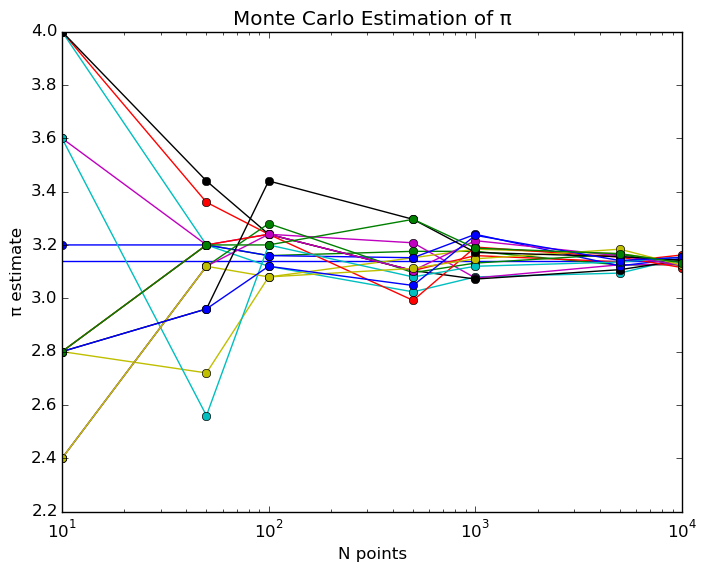

In [46]:
title("Monte Carlo Estimation of π")
ylabel("π estimate")
xlabel("N points")
semilogx(N,π*ones(N));
semilogx(N,πapprox,marker="o");

When we have fewer numbers of points, our estimates vary much more wildly, and much further from 3.1415926 .
But, at least, the guesses from our different runs all seem equally distributed around the correct value, so it seems we have no systematic error.   

As we get up to $10^4$, our estimate starts getting much more accurate and consistent.  

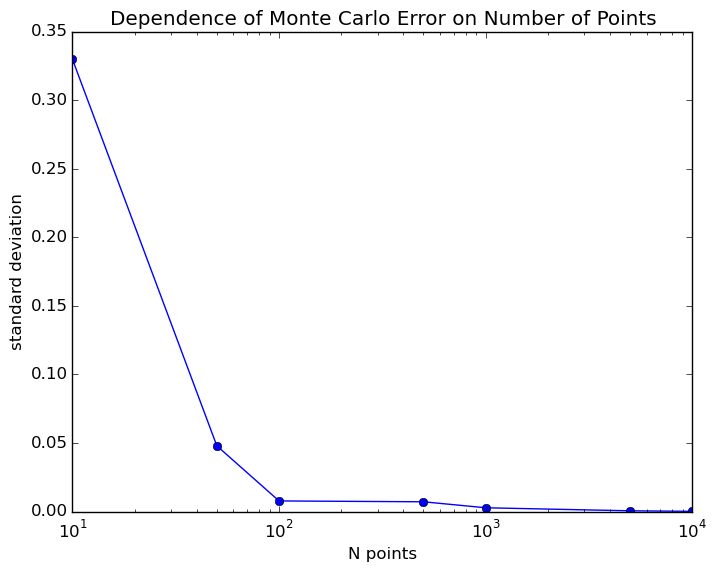

In [45]:
title("Dependence of Monte Carlo Error on Number of Points")
ylabel("standard deviation")
xlabel("N points")
semilogx(N,πstd,marker="o");

So what we guessed in the first plot about dispersion in estimate, we quantify here in this plot.  When we only have 10 darts, the guesses vary by up to .3, but when we get down to 1,000 trials, we are starting to be consistent to .0002 

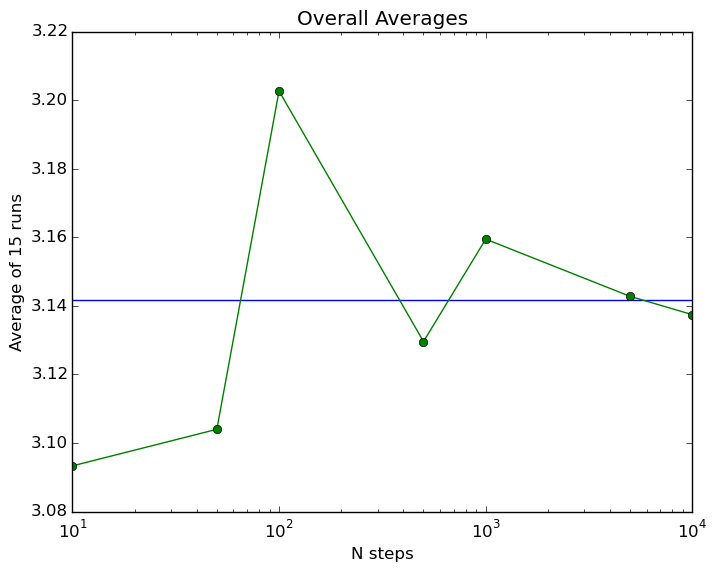

In [50]:
title("Overall Averages")
xlabel("N steps")
ylabel("Average of 15 runs")
semilogx(N,π*ones(N));
semilogx(N,πave,marker="o");

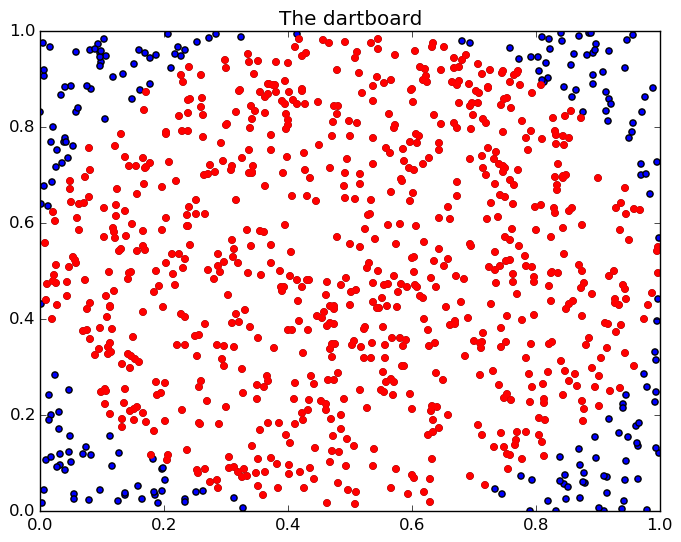

In [48]:
X=zeros(Float64,1000);
Y=zeros(Float64,1000);
rand!(X);
rand!(Y);
R=sqrt((X-.5).^2+(Y-.5).^2);
Xc=[];
Yc=[]
for ii in 1:length(X)
    if R[ii]<.5
        push!(Xc,X[ii]);
        push!(Yc,Y[ii]);
    end
end

title("The dartboard")
xlim(0,1)
ylim(0,1)
scatter(X,Y);
scatter(Xc,Yc,color="red");